In [1]:
from fastai import *
from fastai.vision.all import *
from models import SimpleAutoencoder

import sys
sys.path.append('..')
from src.band_plotters import *
from src.Tiff32Image import Tiff32Image

In [2]:
THRESHOLD = 8 

## Load

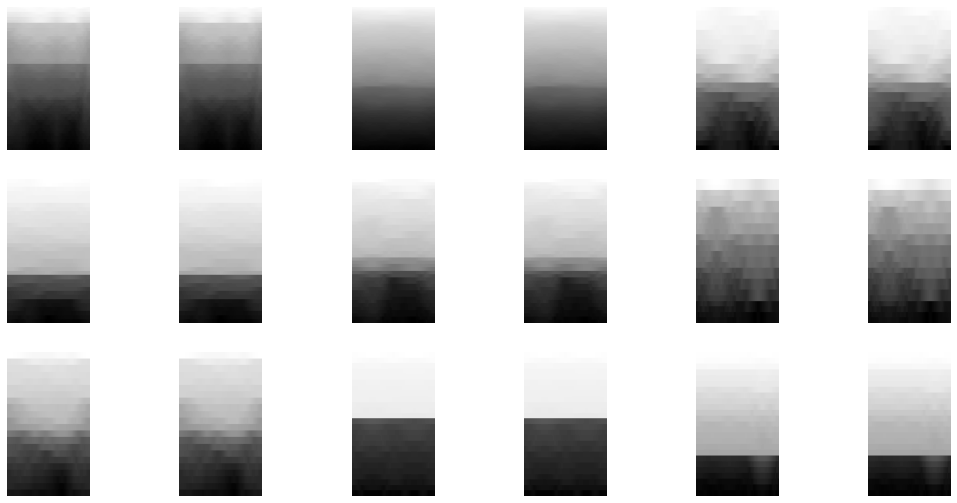

In [10]:
dls = DataBlock(
    blocks=(ImageBlock(cls=Tiff32Image), ImageBlock(cls=Tiff32Image)), 
    get_items=get_image_files,
    n_inp=1,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    # item_tfms=[Resize(256)],
    get_y = [lambda x: x],
    batch_tfms=[IntToFloatTensor(div=2**16-1),],
        ).dataloaders(DATA_DIRECTORY/f"images/energies{THRESHOLD}", bs=32)

dls.show_batch()

## Train

### Create Learner

epoch,train_loss,valid_loss,time
0,0.010244,0.005115,00:06
1,0.003084,0.001845,00:06
2,0.001472,0.001028,00:06
3,0.001006,0.001111,00:06
4,0.000782,0.000719,00:06


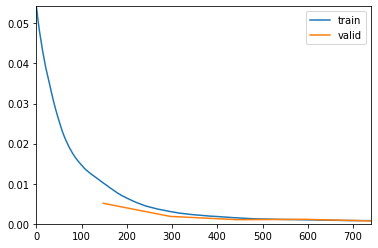

In [15]:
ae = SimpleAutoencoder(n_latent=128)
learn = Learner(dls, ae, F.mse_loss, cbs=[ShowGraphCallback()])
learn.fit_one_cycle(5)

## View Predictions

In [17]:
learn.predict()

Signature: learn.predict(item, rm_type_tfms=None, with_input=False)
Docstring: Prediction on `item`, fully decoded, loss function decoded and probabilities
File:      /usr/local/lib/python3.9/dist-packages/fastai/learner.py
Type:      method
